In [172]:
import warnings
warnings.filterwarnings('ignore') # Aren't I the checky git

In [173]:
import matplotlib.pyplot as plt
import pandas            as pds
import seaborn           as sns
import numpy             as np

from datetime                import datetime
from sklearn.metrics         import classification_report as cr 
from sklearn.metrics         import r2_score as r2
from sklearn.metrics         import accuracy_score as ac 
from sklearn.metrics         import mean_squared_error as mse
from sklearn.metrics         import confusion_matrix as cm
from sklearn.model_selection import train_test_split as tts

from sklearn.naive_bayes     import GaussianNB                 as GNB
from sklearn.naive_bayes     import MultinomialNB              as MNB
from sklearn.ensemble        import GradientBoostingClassifier as GBC 
from sklearn.ensemble        import RandomForestClassifier     as RFC
from sklearn.svm             import SVC                        as SVC
from sklearn.neighbors       import KNeighborsClassifier       as KNC
from sklearn.linear_model    import LogisticRegression         as LRE
from sklearn.linear_model    import LogisticRegressionCV       as LRC

In [381]:
pds.get_(df['disp_dispatch_comment'])

MemoryError: 

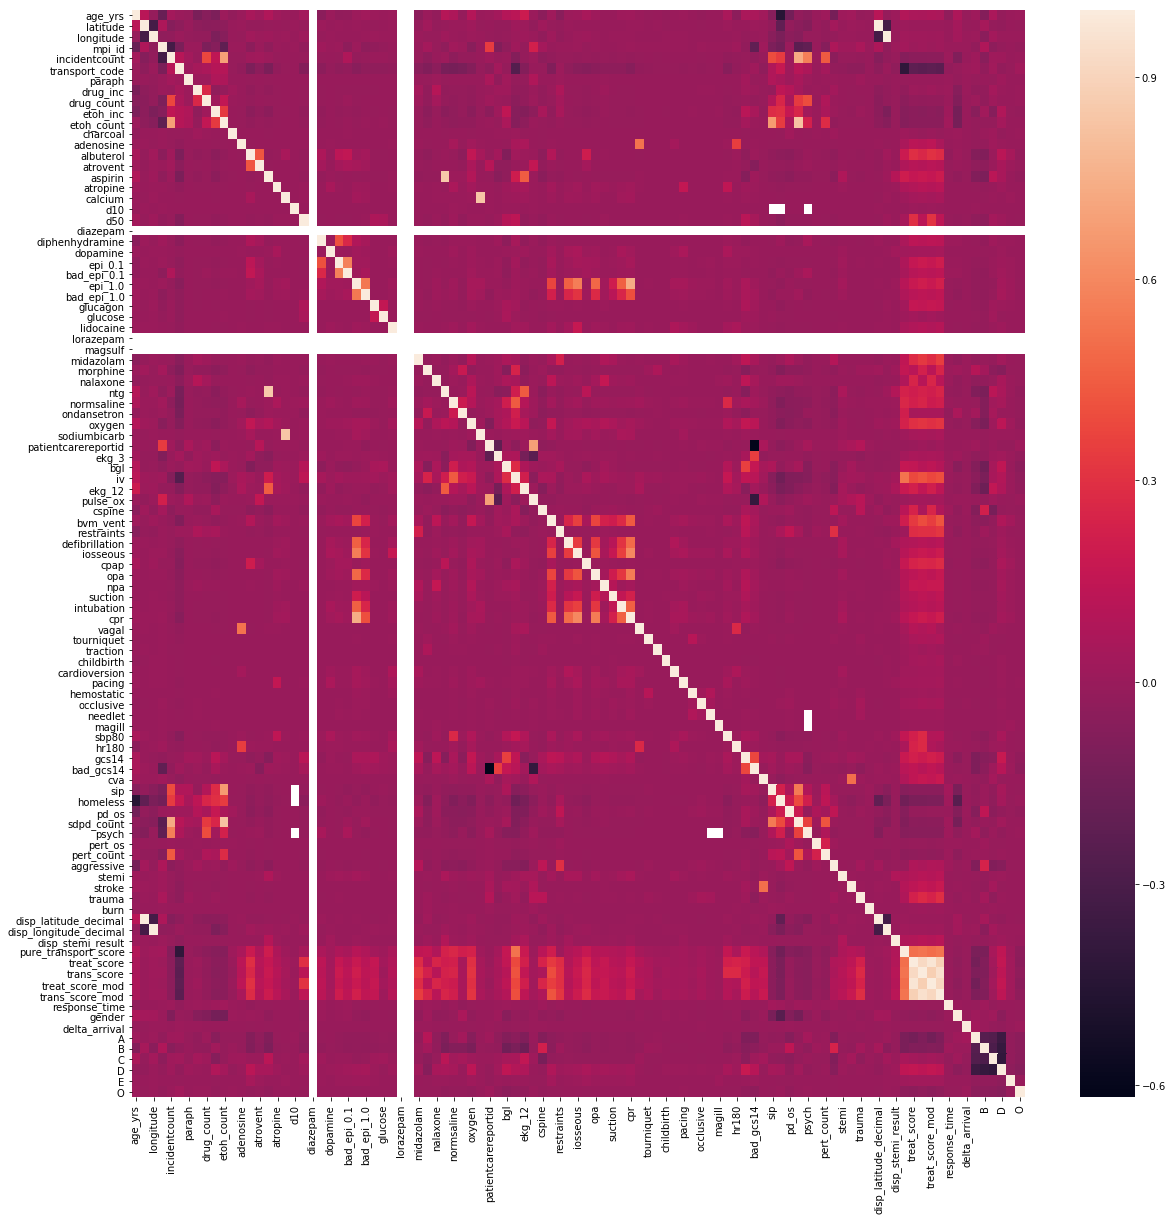

In [387]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr())
plt.show()

In [383]:
pds.get_dummies(df["disp_determinant/medical_code"])

,01A01,01C00,01C01,01C02,01C03,01C04,01C05,01C06,01D00,01D01,...,31D02,31D03,31D04,31E00,31E01,32B01,32B02,32B03,32B04,32D01
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
df = pds.read_csv('insight-full.csv', header=0)
incoming_size = len(df)
df = df[(df['transport_code'].isnull()==False)  & (df['disp_problem_lvl'].isnull()==False) & 
        (df['latitude'].isnull()==False)        & (df['longitude'].isnull()==False) &
        (df['trans_score_mod'].isnull()==False) & (df['treat_score_mod'].isnull()==False) &
        (df['disp_problem_lvl']!='UNKNOWN')     & (df['age_yrs'].isnull()==False) &
        (df['sex'].isnull()==False)             & (df['sex']!='U') & (df['age_yrs']>0) &
        (df['disp_determinant/medical_code'].isnull()==False) &
        (df['disp_determinant/medical_code']!='XXXXX')]
df = df[(df['incidentcount'].isnull()==False) & (df['onscene_time'].isnull()==False)]
df.index = range(len(df))
outgoing_size = len(df)
print('Read in {0} events, working with {1} events.'.format(incoming_size, outgoing_size))
print('{} cut events'.format(incoming_size-outgoing_size))

Read in 342940 events, working with 311866 events.
31074 cut events


# Developing Classifications

How do we rate things as emergency or not?


In [287]:
# print(df['transport_code'].unique())

A level 10 transport code is an acute trama and needs the full response.  These should correspond to L1 response from the dispatcher

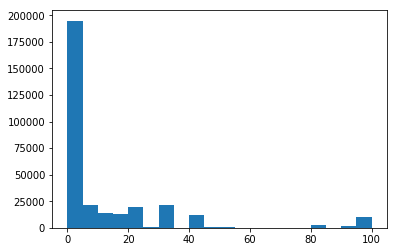

In [288]:
plt.hist(df['trans_score_mod'],bins=20)
plt.show()

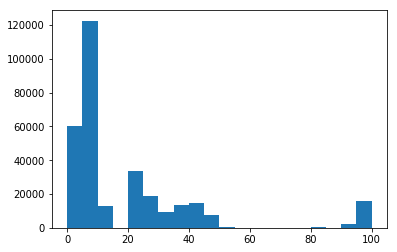

In [289]:
plt.hist(df['treat_score_mod'],bins=20)
plt.show()

#### Classification from documentation
According to the document I was given classification should be:

Low:  treat: 0 - 20,     trans: 0 - 12

Med:  treat: 20 - 92.5,  trans: 12 - 90

High: treat: 92.5 - 100, trans: 90 - 100

The final classification is determined by the highest catagory

In [290]:
df['class'] = 0

df['class'][(df['treat_score_mod'] > 92.4) | (df['trans_score_mod'] > 89.9) | 
            (df['transport_code'] == 10)] = 'L1'
df['class'][(df['treat_score_mod'] < 20)   & (df['trans_score_mod'] < 12)]   = 'L4'
df['class'][df['class']==0] = 'L3'

In [291]:
# df[['class','trans_score_mod','treat_score_mod']].head(15)

#### Classifications:

High = L1

Medium = L3

Low = L4

# Prepare Time Feature

Turn time of day into an float between 0 - 24 by the minute and bin into groups of 15 minutes.

In [292]:
df['response_time'] = df['response_date'].apply(lambda x: x.replace('.000', ''))
df['response_time'] = df['response_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
df['response_time'] = df['response_time'].apply(lambda x: x.hour+x.minute/60.)
# df['response_time'].head(5)

Time is in float types, need to bin the data.

In [293]:
# df['response_date'] = df['response_date'].apply(lambda x: int(x*4)/4.)
# df['response_date'].head(5)

#### Time is formatted.  Decided not to bin

# Preparing sex

Need to change sex from M/F to 0/1

In [294]:
df['gender']                 = 0
df['gender'][df['sex']=='F'] = 1
df['gender'][df['sex']=='M'] = 0
# df['gender'][df['sex']=='M'].head(5)

#### Nothing could be simpler

# What about frequency of calls?

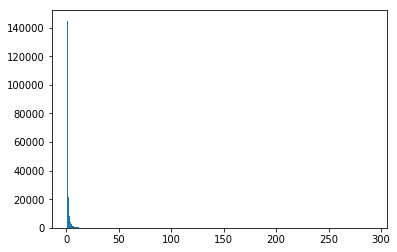

In [295]:
plt.hist(df.groupby('mpi_id')['incidentcount'].mean().values,bins=300)
# print(list(df.groupby('mpi_id')['incidentcount'].mean().values))
plt.show()

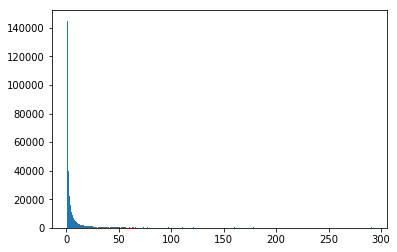

In [296]:
plt.hist(df['incidentcount'],bins=300)
plt.show()

#### Let's go ahead and use this as well.

# Response time
Maybe how long the ambulance takes to reach the person could help inform the model as well

In [310]:
ti = df['response_date'].apply(lambda x: x.replace('.000', ''))
ti = ti.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
ti = ti.apply(lambda x: x.hour+x.minute/60.+x.second/3600)

tf = df['onscene_time'].apply(lambda x: x.replace('.000', ''))
tf = tf.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
tf = tf.apply(lambda x: x.hour+x.minute/60.+x.second/3600)

In [318]:
tt = tf-ti
tt[tt<0] = tt+24
df['delta_arrival'] = tt
# tt = tt.apply(lambda x: x.hour + x.minute/60 + x.seconds/3600)
# print(tt)

#### Now we have how long it takes from the first call until arrival

# Choosing problems to work on

Only going to work on the biggest dispatch code to begin with.  I think this makes more sense than trying to do everything together.

In [319]:
code_list = list(df['disp_determinant/medical_code'].unique())
code_dict = {}
for i in range(len(code_list)):
    code_dict[code_list[i]] = i

In [320]:
for code in code_list:
    if len(df['disp_determinant/medical_code'][df['disp_determinant/medical_code']==code]) > 10000:
        print(code)

31D03
06D02
26D01
17B01
29B04


#### Let's pull out every time this situation comes up, no matter the response level

In [321]:
df['event'] = [x[:2]+x[3:] for x in df['disp_determinant/medical_code']]

#### Then serialize the response level part of the code

In [322]:
df['disp_level_code'] = 0
df['disp_level_code'] = [x[2] for x in df['disp_determinant/medical_code']]

In [323]:
df['disp_level_code'].unique()

array(['B', 'C', 'D', 'A', 'E', 'O'], dtype=object)

In [324]:
df['A'] = 0; df['A'][df['disp_level_code']=='A'] = 1
df['B'] = 0; df['B'][df['disp_level_code']=='B'] = 1
df['C'] = 0; df['C'][df['disp_level_code']=='C'] = 1
df['D'] = 0; df['D'][df['disp_level_code']=='D'] = 1
df['E'] = 0; df['E'][df['disp_level_code']=='E'] = 1
df['O'] = 0; df['O'][df['disp_level_code']=='O'] = 1

#### Creating a df for each of these so they don't get confused

In [325]:
df_3103 = df[df['event']=='3103']
df_0602 = df[df['event']=='0602']
df_2601 = df[df['event']=='2601']
df_1701 = df[df['event']=='1701']
df_2904 = df[df['event']=='2904']

#### We now have 5 types of incidents to look at

# What do I have?
gender

age_yrs

A B C D E O

delta_arrival

response_time

incidentcount

class

#### These will be examined for specific events (types of injuries)

# Let's get ready

In [326]:
print(len(df_3103))
print(len(df_0602))
print(len(df_2601))
print(len(df_1701))
print(len(df_2904))

12132
14301
33118
20076
10160


In [327]:
train_0602, test_0602 = tts(df_0602, test_size=0.2)
train_1701, test_1701 = tts(df_1701, test_size=0.2)
train_2601, test_2601 = tts(df_2601, test_size=0.2)
train_2904, test_2904 = tts(df_2904, test_size=0.2)
train_3103, test_3103 = tts(df_3103, test_size=0.2)

# What does the data look like?

       response_time    age_yrs    gender    A    B    C    D    O  \
class                                                                
L1         12.274922  64.425703  0.475904  0.0  0.0  0.0  1.0  0.0   
L3         12.549028  61.523365  0.525799  0.0  0.0  0.0  1.0  0.0   
L4         13.095265  49.446578  0.545925  0.0  0.0  0.0  1.0  0.0   

       incidentcount  delta_arrival  
class                                
L1          5.738956       0.155952  
L3          8.632631       0.142468  
L4          9.359298       0.139243  
       response_time    age_yrs    gender    A    B    C    D    O  \
class                                                                
L1          6.781351  20.318917  0.499586  0.0  0.0  0.0  0.0  0.0   
L3          6.512549  21.339516  0.499379  0.0  0.0  0.0  0.0  0.0   
L4          6.533817  23.986139  0.497942  0.0  0.0  0.0  0.0  0.0   

       incidentcount  delta_arrival  
class                                
L1         12.145694       0.620

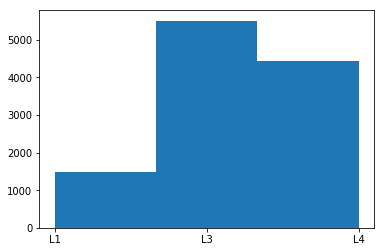

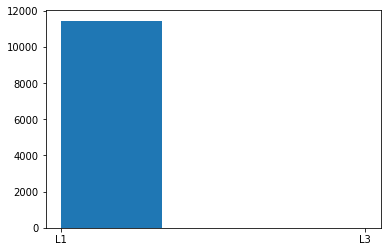

In [589]:
print(train_0602[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').mean())
print(train_0602[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').std())
plt.hist(train_0602['class'],bins=3)
plt.show()
plt.hist(train_0602['disp_problem_lvl'],bins=3)
plt.show()

       response_time    age_yrs    gender         A         B    C         D  \
class                                                                          
L1         13.794537  68.458519  0.431481  0.146296  0.831481  0.0  0.022222   
L3         13.583633  68.732767  0.608893  0.316008  0.682806  0.0  0.001186   
L4         13.466466  66.475440  0.572849  0.310421  0.687954  0.0  0.001625   

         O  incidentcount  delta_arrival  
class                                     
L1     0.0       4.196296       0.148954  
L3     0.0       4.496838       0.157135  
L4     0.0       6.815296       0.145712  
       response_time    age_yrs    gender         A         B    C         D  \
class                                                                          
L1          5.867833  21.137172  0.495742  0.353731  0.374673  0.0  0.147542   
L3          5.703620  21.017071  0.488046  0.464962  0.465430  0.0  0.034418   
L4          6.007702  24.194432  0.494688  0.462688  0.463351  0

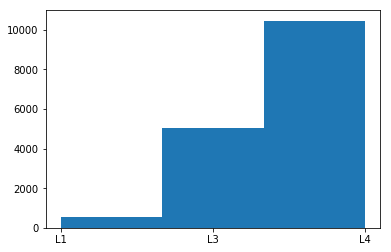

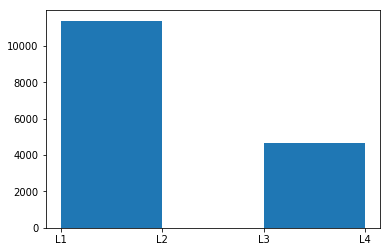

In [329]:
print(train_1701[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').mean())
print(train_1701[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').std())
plt.hist(train_1701['class'],bins=3)
plt.show()
plt.hist(train_1701['disp_problem_lvl'],bins=3)
plt.show()

       response_time    age_yrs    gender         A         B         C  \
class                                                                     
L1         13.305328  60.952864  0.414087  0.082043  0.123065  0.204334   
L3         13.505137  62.558681  0.453627  0.220784  0.159603  0.143997   
L4         13.097656  53.071829  0.435567  0.299903  0.200174  0.104892   

              D    O  incidentcount  delta_arrival  
class                                               
L1     0.590557  0.0       4.910217       0.168547  
L3     0.475616  0.0       6.426317       0.162338  
L4     0.395031  0.0      11.373051       0.175795  
       response_time    age_yrs    gender         A         B         C  \
class                                                                     
L1          5.834968  21.700575  0.492754  0.274537  0.328639  0.403371   
L3          5.706626  21.823430  0.497889  0.414812  0.366270  0.351118   
L4          6.467049  22.082751  0.495844  0.458227  0.4001

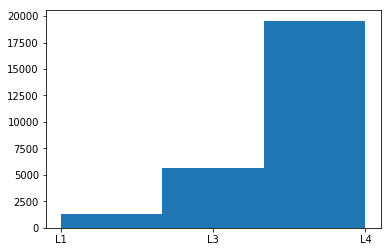

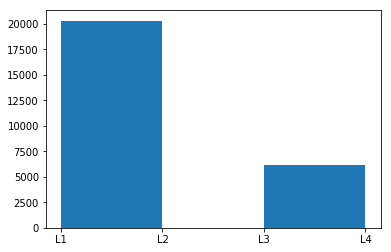

In [330]:
print(train_2601[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').mean())
print(train_2601[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').std())
plt.hist(train_2601['class'],bins=3)
plt.show()
plt.hist(train_2601['disp_problem_lvl'],bins=3)
plt.show()

       response_time    age_yrs    gender    A         B    C         D    O  \
class                                                                          
L1         13.540192  38.602980  0.344507  0.0  1.000000  0.0  0.000000  0.0   
L3         13.659853  41.395552  0.544228  0.0  0.997501  0.0  0.002499  0.0   
L4         14.162293  36.797657  0.533631  0.0  0.998211  0.0  0.001789  0.0   

       incidentcount  delta_arrival  
class                                
L1          1.342644       0.180476  
L3          1.359320       0.179418  
L4          1.220930       0.154139  
       response_time    age_yrs    gender    A         B    C         D    O  \
class                                                                          
L1          6.800284  19.445366  0.475650  0.0  0.000000  0.0  0.000000  0.0   
L3          5.681593  18.269116  0.498165  0.0  0.049937  0.0  0.049937  0.0   
L4          5.698831  19.431973  0.498912  0.0  0.042261  0.0  0.042261  0.0   

       i

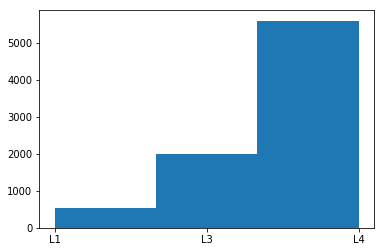

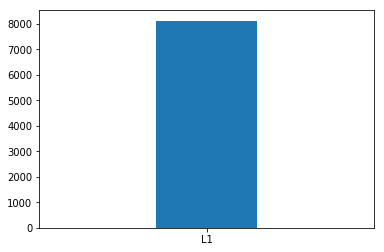

In [331]:
print(train_2904[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').mean())
print(train_2904[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').std())
plt.hist(train_2904['class'],bins=3)
plt.show()
plt.hist(train_2904['disp_problem_lvl'],bins=3)
plt.show()

       response_time    age_yrs    gender         A    B         C         D  \
class                                                                          
L1         13.454411  63.756997  0.426209  0.005089  0.0  0.000000  0.994911   
L3         13.580312  59.616863  0.526533  0.044222  0.0  0.022406  0.933373   
L4         13.707861  45.990809  0.537905  0.094084  0.0  0.032206  0.873711   

         O  incidentcount  delta_arrival  
class                                     
L1     0.0       4.006361       0.169021  
L3     0.0       4.190153       0.160064  
L4     0.0       6.881129       0.145631  
       response_time    age_yrs    gender         A    B         C         D  \
class                                                                          
L1          5.540703  20.689962  0.494840  0.071201  0.0  0.000000  0.071201   
L3          5.222744  22.883837  0.499369  0.205618  0.0  0.148021  0.249412   
L4          5.878070  23.630110  0.498606  0.291971  0.0  0.1765

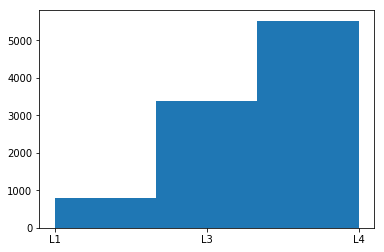

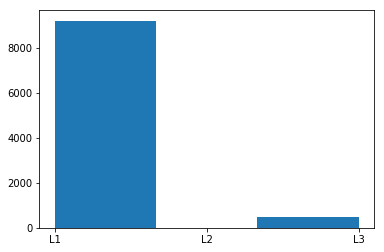

In [333]:
print(train_3103[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').mean())
print(train_3103[['response_time', 'age_yrs', 'gender', 'class',
                  'A','B','C','D','O','incidentcount', 'delta_arrival']].groupby('class').std())
plt.hist(train_3103['class'],bins=3)
plt.show()
plt.hist(train_3103['disp_problem_lvl'],bins=3)
plt.show()

# 2601 model training

In [541]:
features = ['response_time', 'age_yrs', 'gender','A','B','C','D','O','incidentcount', 'delta_arrival']
# features = ['response_time', 'age_yrs', 'gender','A','B','C','D','O','incidentcount']

In [542]:
model = GNB()
GNB_2601_model = model.fit(train_2601[features], train_2601['class'])
GNB_2601_prob  = model.predict_proba(test_2601[features])

In [543]:
model = LRE()
LRE_2601_model = model.fit(train_2601[features], train_2601['class'])
LRE_2601_prob  = model.predict_proba(test_2601[features])
LRE_2601_pred  = model.predict(test_2601[features])

In [544]:
model = RFC()
RFC_2601_model = model.fit(train_2601[features], train_2601['class'])
RFC_2601_prob  = model.predict_proba(test_2601[features])

In [545]:
model = GBC()
GBC_2601_model = model.fit(train_2601[features], train_2601['class'])
GBC_2601_prob  = model.predict_proba(test_2601[features])

In [546]:
model = MNB()
MNB_2601_model = model.fit(train_2601[features], train_2601['class'])
MNB_2601_prob  = model.predict_proba(test_2601[features])

In [547]:
model = LRC()
LRC_2601_model = model.fit(train_2601[features], train_2601['class'])
LRC_2601_prob  = model.predict_proba(test_2601[features])

# 2601 testing models

In [548]:
test_2601['LRE_pred'] = 0
test_2601['LRE_pred'] = ['L1' if x[0] > 0.05 else 'L3' if x[1] > x[2] else 'L4' for x in LRE_2601_prob]
# print(test_2601['LRE_pred'][test_2601['LRE_pred']!='L4'])

In [549]:
test_2601['RFC_pred'] = 0
test_2601['RFC_pred'] = ['L1' if x[0] > 0.0005 else 'L3' if x[1] > x[2] else 'L4' for x in RFC_2601_prob]
# print(test_2601['RFC_pred'][test_2601['RFC_pred']!='L4'])

In [576]:
test_2601['GBC_pred'] = 0
test_2601['GBC_pred'] = ['L1' if x[0] > 0.019 else 'L3' if x[1] > x[2] else 'L4' for x in GBC_2601_prob]

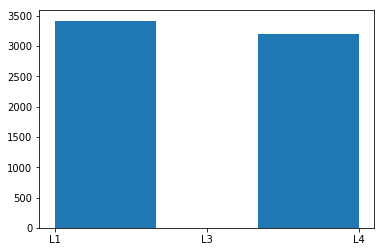

In [577]:
test_2601['GNB_pred'] = 0
test_2601['GNB_pred'] = ['L1' if x[0] > 0.025 else 'L3' if x[1] > x[2] else 'L4' for x in GNB_2601_prob]
plt.hist(test_2601['GNB_pred'],bins=3); plt.show()

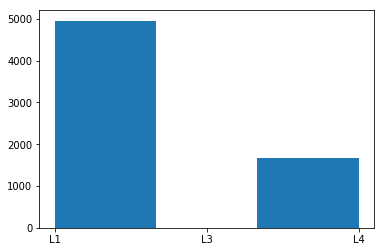

In [578]:
test_2601['MNB_pred'] = 0
test_2601['MNB_pred'] = ['L1' if x[0] > 0.020 else 'L3' if x[1] > x[2] else 'L4' for x in MNB_2601_prob]
plt.hist(test_2601['MNB_pred'], bins=3); plt.show()

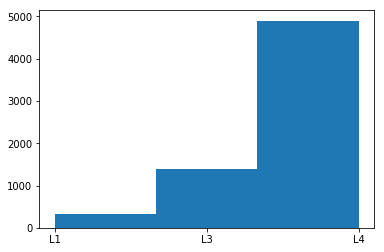

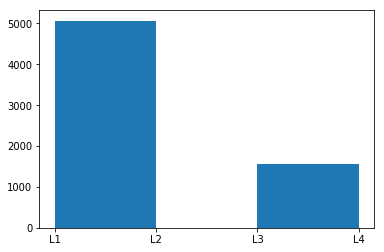

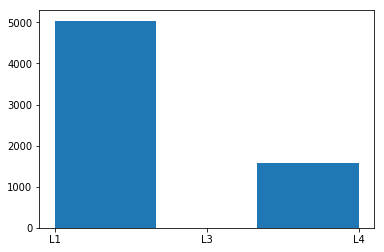

In [579]:
plt.hist(test_2601['class'], bins=3)
plt.show()
plt.hist(test_2601['disp_problem_lvl'], bins=3)
plt.show()
plt.hist(test_2601['GBC_pred'], bins=3)
plt.show()

In [585]:
print(cm(test_2601['class'],test_2601['GBC_pred']))

[[ 312    0   20]
 [1188    0  204]
 [3541    1 1358]]


In [581]:
print(cm(test_2601['class'],test_2601['disp_problem_lvl']))

[[ 309    0   12   11]
 [   0    0    0    0]
 [1160    0  104  128]
 [3598    2  306  994]]


In [109]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(df_06D02['class'].unique),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=(df_06D02['class'].unique), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

TypeError: 'method' object is not iterable

In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')